In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

## Get the stock symbols / tickers in the portfolio
### FAANG (best US tech companies)


In [14]:
assets = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
# Get the stock/portfolio starting date
start_date = datetime.strptime('2013-01-01', '%Y-%m-%d')
start_date

datetime.datetime(2013, 1, 1, 0, 0)

In [5]:
# Get the stocks ending date (today)
end_date = date.today()
end_date

datetime.date(2023, 8, 18)

In [15]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the stock into the Dataframe
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']
print(data.tail())

for stock in assets:
    df[stock] = yf.download(stock, start=start_date, end=end_date)['Adj Close']

df.tail()

[*********************100%***********************]  5 of 5 completed
                  AAPL        AMZN        GOOG        META        NFLX
Date                                                                  
2023-08-11  177.789993  138.410004  130.169998  301.640015  421.660004
2023-08-14  179.460007  140.570007  131.830002  306.190002  427.779999
2023-08-15  177.449997  137.669998  130.270004  301.950012  423.700012
2023-08-16  176.570007  135.070007  129.110001  294.290009  415.450012
2023-08-17  174.000000  133.979996  130.460007  285.089996  403.000000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2023-08-11,301.640015,138.410004,177.789993,421.660004,130.169998
2023-08-14,306.190002,140.570007,179.460007,427.779999,131.830002
2023-08-15,301.950012,137.669998,177.449997,423.700012,130.270004
2023-08-16,294.290009,135.070007,176.570007,415.450012,129.110001
2023-08-17,285.089996,133.979996,174.000000,403.000000,130.460007


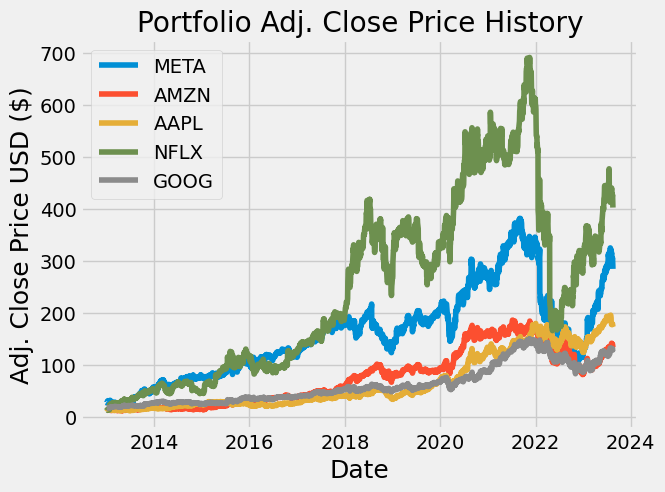

In [29]:
# Visualise the portfolio
title = 'Portfolio Adj. Close Price History'

my_stocks = df.copy()

# Create and plot the graph
for ticker in df.columns.values:
    plt.plot(df[ticker], label = ticker)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.legend(df.columns.values, loc = 'upper left')

In [30]:
 # Show the daily simple return

returns = df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2023-08-11,-0.013410,-0.001083,0.000338,-0.019350,-0.000307
2023-08-14,0.015084,0.015606,0.009393,0.014514,0.012753
2023-08-15,-0.013848,-0.020630,-0.011200,-0.009538,-0.011833


In [33]:
# Create and show the annualized covariance matrix
# 252 -> Nr of trading days
# cov_matrix -> Determines how much two random variables vary or move together, directional relationship between two asset prices

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.149368,0.068876,0.053133,0.074375,0.063166
AMZN,0.068876,0.107374,0.046868,0.073715,0.056485
AAPL,0.053133,0.046868,0.082146,0.043290,0.044535
NFLX,0.074375,0.073715,0.043290,0.222990,0.055520
GOOG,0.063166,0.056485,0.044535,0.055520,0.075368


In the diagonal line we have the variance and all the rest of the entries are the covariance.
If we take the square root of variance we get the volatility

In [34]:
# Calculate the portfolio variance

portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

0.07188690016190036

In [35]:
# Calculate the portfolio volatility aka standard deviation

portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.26811732536690047

In [ ]:
# Calculate the annual portfolio return

portfolio_simple_annual_return = np.sum(returns